<a id='start'></a>
# Определение закономерности, влияющей на успешность игр<br>


<div style="text-align: justify ">Необходимо определить закономерность, определяющю успешность игры, что позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании на 2017-й год. В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».</div>


<b>Задача:</b><br>
1) определить факторы, влияющие на успешность игр.

<b>Ход исследования: </b>
1) Обзор данных;<br>

2) Предобработка данных;<br>

3) Проведение исследовательского анализа данных:
- сколько игр выпускалось в разные годы;<br>
- как менялись продажи по платформам;<br>
- какие платформы лидируют по продажам;<br>
- просмотр выбросов по глобальным продажам игр в разбивке по платформам;<br>
- оценка влияния продажи внутри одной популярной платформы на отзывы пользователей и критиков;<br>
- анализ общего распределения игр по жанрам;<br>

4) Портрет пользователя каждого региона;<br>

5) Проверка гипотез: 
- "средние пользовательские рейтинги платформ Xbox One и PC одинаковые";<br>
- "средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные".<br>

6) Подготовка общего вывода.

<b>Описание данных:</b>


<b>Name</b> — название игры<br>
<b>Platform</b> — платформа<br>
<b>Year_of_Release</b> — год выпуска<br>
<b>Genre</b> — жанр игры<br>
<b>NA_sales</b> — продажи в Северной Америке (миллионы проданных копий)<br>
<b>EU_sales</b> — продажи в Европе (миллионы проданных копий)<br>
<b>JP_sales</b> — продажи в Японии (миллионы проданных копий)<br>
<b>Other_sales</b> — продажи в других странах (миллионы проданных копий)<br>
<b>Critic_Score</b> — оценка критиков (максимум 100)<br>
<b>User_Score</b> — оценка пользователей (максимум 10)<br>
<b>Rating</b> — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

### 1. Обзор данных

In [1]:
#Подключим необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st
import warnings

In [2]:
#задаем исхожные настройки
pd.set_option('display.max_columns', None)
warnings.filterwarnings("ignore")

In [3]:
#Загрузим данные
df = pd.read_csv('/datasets/games.csv')

In [4]:
#Базовая функция для ознакомления с данными: инфо о типах, пропусках, явных дубликатах
def show_data(df):
    display(df.head(20))
    print('-----')
    print('Информация о типах данных')
    df.info()
    print('-----')
    for col in df.columns:
        print('Название:', col, '\nПропусков:\t', df[col].isna().sum(), 'Процент пропусков:\t', round(df[col].isna().sum() *100 / len(df[col])))
    round(df[col].isna().sum() *100 / len(df[col]))
    print('-----')
    print('Явных дубликатов')
    print(df.duplicated().sum())
    df.hist(figsize=(10, 15));

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


-----
Информация о типах данных
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
-----
Название: Name 
Пропусков:	 2 Процент пропусков:	 0
Название: Platform 
Пропусков:	 0 Процент пропусков:	 0
Название: Year_of_Release 
Пропусков:	 269 Процент пропусков:	 2
Название: Genre 
Пропусков:	 2

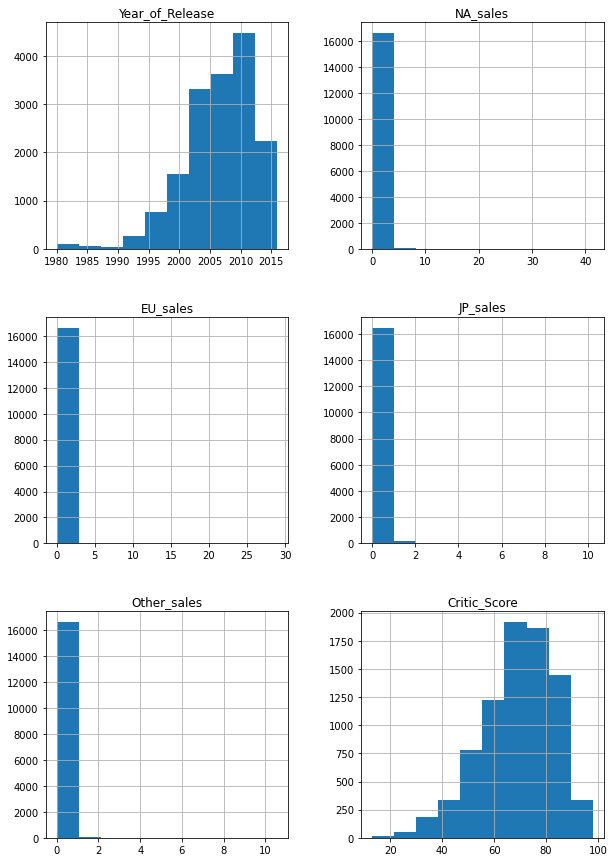

In [5]:
show_data(df)

<b>Вывод: </b>Массив данных состоит из 16 715 строк. В данных присутствую пропуски, которые необходимо будет заполнить, оснавная часть из которых состоит из пропусков по оценка и рейтингу. Явных дубликатов не обнаружено. Необходимо будет просмотреть данные на наличии аномалий.

### 2. Предобработка данных

<u><b>Привидение наименования столбцов в "змеиный" формат

In [6]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [7]:
# Наведение "красоты" путем перевода все букв в строчный формат
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

<u><b>Устранение пропусков и изменение типов данных

In [8]:
# устранение пропусков в столбце 'name', 'year_of_release' и 'genre'
df = df.dropna(subset=['name','year_of_release','genre'])

In [9]:
# изменение типа столбца "year_of_release" на целочисленное
df['year_of_release'] = df['year_of_release'].astype(int)

Для устранения пропусков по столбцам 'name', 'genre' и 'year_of_release' было принято решение удалить строки с пропущенными значения, так как количество пропусков ничтожно мало (не более 2%). Также был изменен тип 'year_of_release' на целочисленное, так как это год.

In [10]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [11]:
# изменение 'tbd' и устранение пропусков в столбце 'user_score'
df.loc[df['user_score'] == 'tbd', 'user_score'] = -1
df['user_score'] = df['user_score'].fillna(-1).astype(float)
df['user_score'].unique()

array([ 8. , -1. ,  8.3,  8.5,  6.6,  8.4,  8.6,  7.7,  6.3,  7.4,  8.2,
        9. ,  7.9,  8.1,  8.7,  7.1,  3.4,  5.3,  4.8,  3.2,  8.9,  6.4,
        7.8,  7.5,  2.6,  7.2,  9.2,  7. ,  7.3,  4.3,  7.6,  5.7,  5. ,
        9.1,  6.5,  8.8,  6.9,  9.4,  6.8,  6.1,  6.7,  5.4,  4. ,  4.9,
        4.5,  9.3,  6.2,  4.2,  6. ,  3.7,  4.1,  5.8,  5.6,  5.5,  4.4,
        4.6,  5.9,  3.9,  3.1,  2.9,  5.2,  3.3,  4.7,  5.1,  3.5,  2.5,
        1.9,  3. ,  2.7,  2.2,  2. ,  9.5,  2.1,  3.6,  2.8,  1.8,  3.8,
        0. ,  1.6,  9.6,  2.4,  1.7,  1.1,  0.3,  1.5,  0.7,  1.2,  2.3,
        0.5,  1.3,  0.2,  0.6,  1.4,  0.9,  1. ,  9.7])

Пропуски в оценке игры пользователями или критиками скорее всего обусловлены отсутствием таких оценок, как "таковых". Например игра еще не пройдена или уже не заинтересовала пользователя. В столбце `user_score` значение `tbd` означает `To Be Determined`, что в переводе с английского `будет определено`. Пропущенные значения можно было заменить на `Nan`, но для дальнейшей фильтрации этот подход будет не совсем удобен. Также для `user_score` был изменен тип на вещественный.

In [12]:
#устранение пропусков в столбце 'critic_score'
df['critic_score'] = df['critic_score'].fillna(-1)
df['critic_score'].isna().sum()

0

In [13]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию:

<b>«EC»</b> («Early childhood») — «Для детей младшего возраста»;<br>
<b>«E»</b> («Everyone») — «Для всех»;<br>
<b>«E10+» </b>(«Everyone 10 and older») — «Для всех от 10 лет и старше»;<br>
<b>«T»</b> («Teen») — «Подросткам»:<br>
<b>«M» </b>(«Mature») — «Для взрослых»;<br>
<b>«AO»</b> («Adults Only 18+») — «Только для взрослых»;<br>
<b>«RP»</b> («Rating Pending») — «Рейтинг ожидается»;<br>
<b>«K-A»</b> («Kids to Adults»)— «Для детей и взрослых».<br>

Возможно пропуски в "райтинге" обусловлены еще не установленным показателям.<br>
Можем заменить такие пропуски ярлыком <b>"RP"</b>  («Rating Pending») — «Рейтинг ожидается».

In [14]:
df['rating'] = df['rating'].fillna('RP')
df['rating'].unique()

array(['E', 'RP', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC'], dtype=object)

In [15]:
df.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

<u><b>Добавление столбца с числом продаж по всем регионам

In [16]:
df['total_sales'] = df[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,RP,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,RP,31.38


<u><b>Поиск неявных дубликатов

In [17]:
df['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [18]:
df['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

При дополнительном просмотре неявных дубликатов выявлено не было.

<div style="text-align: justify "><b>Вывод: </b>При проведении предобработки данных было обнаружено большое количество пропущенных значений. Пропуски по столбцам с наименование, жанром и годами выпуска были удалены, так как в общей массей их было достаточно мало (менее 2%). Пропуски с оценками критиков или пользователей были заменены на  "-1" для удобства фильтрации в дальнейшем. Пропуски по данным столбцам обусловлены фактическим отсутствием оценок, также были заменены и значения "tbd". Пропуски в рейтинге были заменены на категорию <b>RP</b> - «Рейтинг ожидается». Дополнительно был добавлен столбец с общим числом продаж по всем регионам. При дополнительном анализе массива данных каких-либо неявных дубликатов выявлено не было.</div>

### 3. Исследовательский анализ данных

<u><b>Анализ выпуска игр по годам

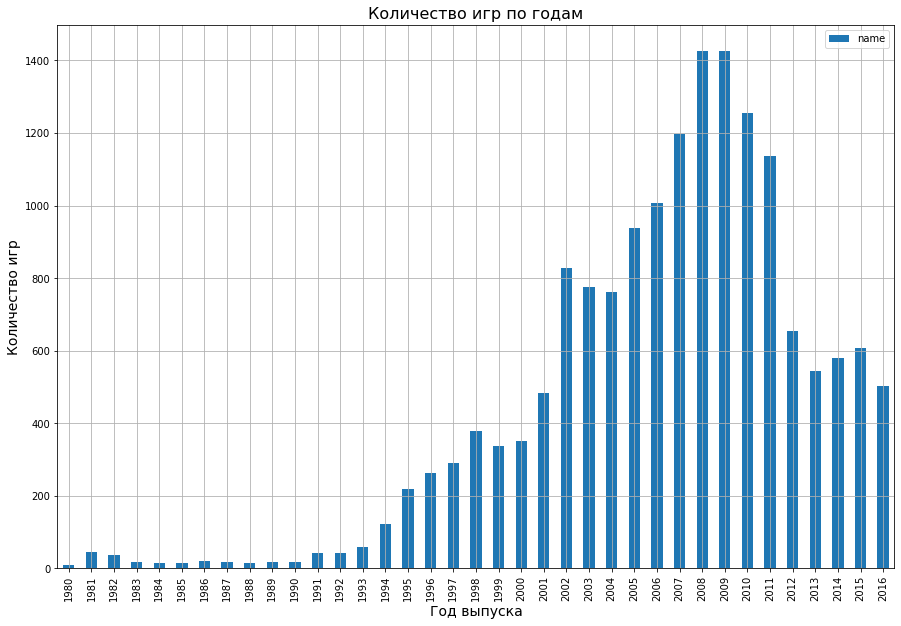

In [19]:
df.pivot_table(index = 'year_of_release', values = 'name', aggfunc = 'count')\
    .plot(kind = 'bar', grid=True, figsize=(15, 10))

plt.title('Количество игр по годам', fontsize = 16)
plt.ylabel('Количество игр', fontsize = 14)
plt.xlabel('Год выпуска', fontsize = 14);


<b>Вывод: </b>рост по созданию игр наблюдается с 1994 года, но игр создавалось еще крайне мало (менее 200 в год). Большой скачок уже наблюдается в 2002 году (более 800 игр в год). Пик приходится на 2008, 2009 года, в эти года производилось более 1400 игр в год. Затем наблюдается снижение. При дальнейше анализе будет использоваться период с 2001 по 2016 года, так как создание игр на данном рубеже уже было стабильно больше 400 в год. Также стоит отметить популярность компьютерных, которая как раз и началась в 2000 годах. 

<u><b>Анализ продаж по платформам

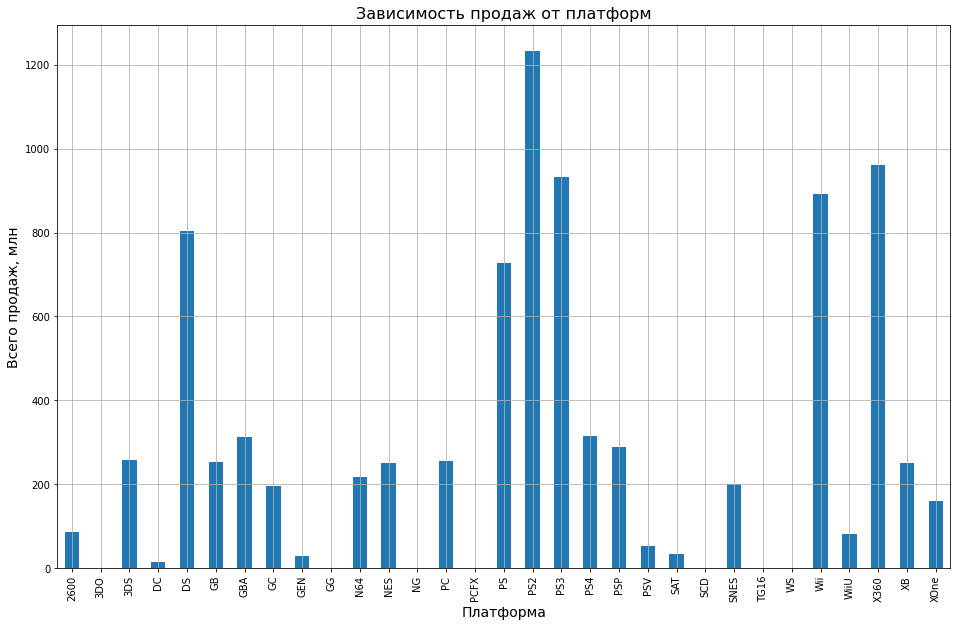

In [20]:
df.groupby('platform').agg({'total_sales':'sum'})\
     .plot(kind = 'bar', grid=True, legend=False, figsize=(16, 10))

plt.title('Зависимость продаж от платформ', fontsize = 16)
plt.ylabel('Всего продаж, млн', fontsize = 14)
plt.xlabel('Платформа', fontsize = 14);

Отсортируем платформы по общему количеству продаж игр и построим барплот для отображения результата.

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
Name: total_sales, dtype: float64

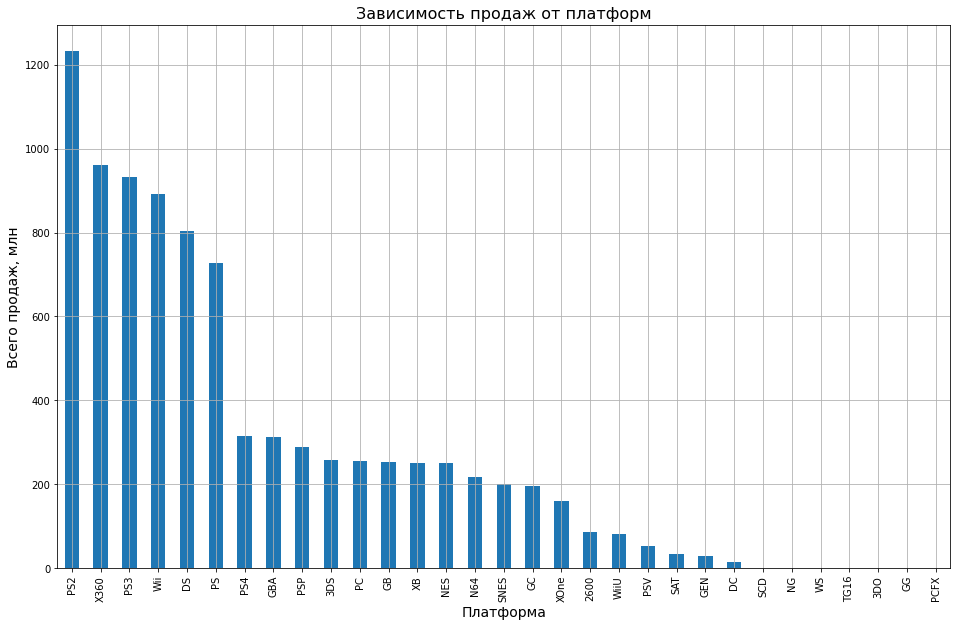

In [21]:
top_platf = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
top_platf.plot(kind = 'bar', grid=True, legend=False, figsize=(16, 10))
plt.title('Зависимость продаж от платформ', fontsize = 16)
plt.ylabel('Всего продаж, млн', fontsize = 14)
plt.xlabel('Платформа', fontsize = 14);
top_platf.head()

Возьмем топ-5 платформы с числом продаж более 800 млн экземпляров.

In [22]:
#Отбор первых 5 платформ
top_5_platf = top_platf.index[0:5]
top_5_platf

Index(['PS2', 'X360', 'PS3', 'Wii', 'DS'], dtype='object', name='platform')

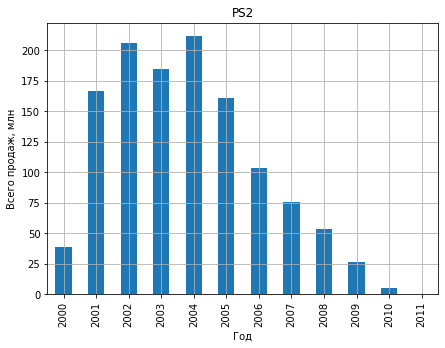

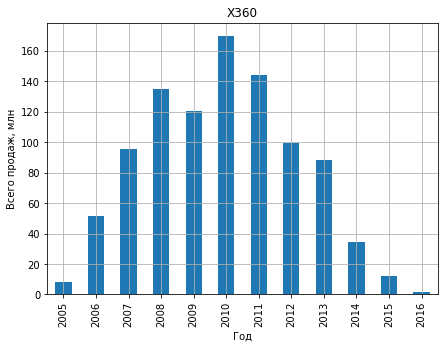

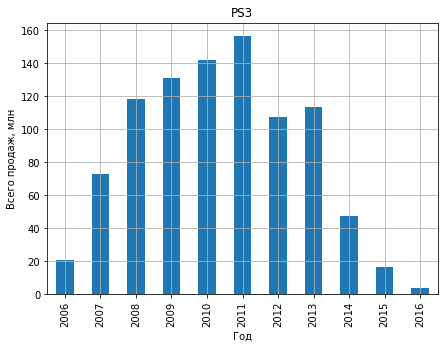

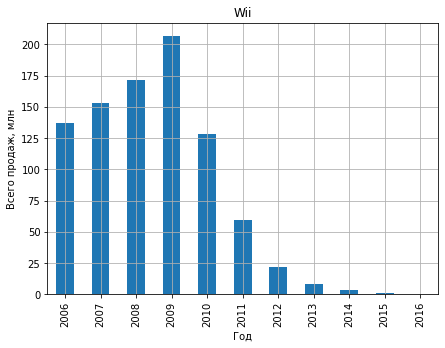

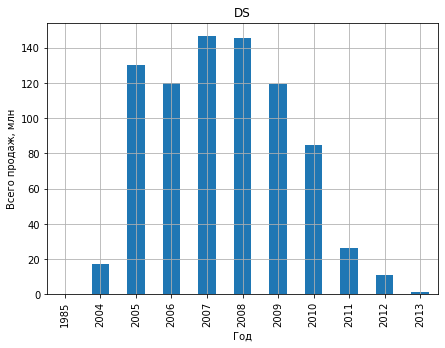

In [23]:
# Построение графика для каждой платформы
for platf in top_5_platf:
    (
        df[df['platform'] == platf]
        .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
        .plot(kind = 'bar', grid=True, legend=False, figsize=(7, 5))
    )

    plt.title(platf)
    plt.ylabel('Всего продаж, млн')
    plt.xlabel('Год')

<b>Вывод: </b> Средний срок "жизни" платформы составляет 6-8 лет. Как правило пик популярности приходится на 3-6 года. Но сильный рост популярности замечается уже со второго года, возможно это связано с доступностью игровых приставок. Также в ходе анализа была выявлена аномалия, первый год выпуска игры на `Nintendo DS` был 1985, хотя приставка была выпущена в только в 2004.

Так как пики продаж приходятся на 3-6 года, актуальный период возьмем по середине (4 года).

In [24]:
#подготовка актуальных данных для анализа

df_actual = df.query('year_of_release > 2012').reset_index()
df_actual.head(15)

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,RP,14.63
3,33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1.0,-1.0,RP,14.60
4,42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
5,47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,-1.0,-1.0,RP,11.68
6,60,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24
7,69,Call of Duty: Ghosts,PS3,2013,Shooter,4.10,3.63,0.38,1.25,71.0,2.6,M,9.36
8,72,Minecraft,X360,2013,Misc,5.70,2.65,0.02,0.81,-1.0,-1.0,RP,9.18
9,77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58


<u><b> Динамика продаж по платформам

In [25]:
df_actual_1 = df_actual.pivot_table(index={'year_of_release', 'platform'}, values='total_sales', aggfunc = 'sum')
df_actual_1

total_sales
platform year_of_release             
3DS      2013                   56.57
         2014                   43.76
         2015                   27.78
         2016                   15.14
DS       2013                    1.54
PC       2013                   12.38
         2014                   13.28
         2015                    8.52
         2016                    5.25
PS3      2013                  113.25
         2014                   47.76
         2015                   16.82
         2016                    3.60
PS4      2013                   25.99
         2014                  100.00
         2015                  118.90
         2016                   69.25
PSP      2013                    3.14
         2014                    0.24
         2015                    0.12
PSV      2013                   10.59
         2014                   11.90
         2015                    6.25
         2016                    4.25
Wii      2013                    8.59
         2014                    3.75
         2015                    1.14
         2016                    0.18
WiiU     2013                   21.65
         2014                   22.03
         2015                   16.35
         2016                    4.60
X360     2013                   88.58
         2014                   34.74
         2015                   11.96
         2016                    1.52
XOne     2013                   18.96
         2014                   54.07
         2015                   60.14
         2016                   26.15

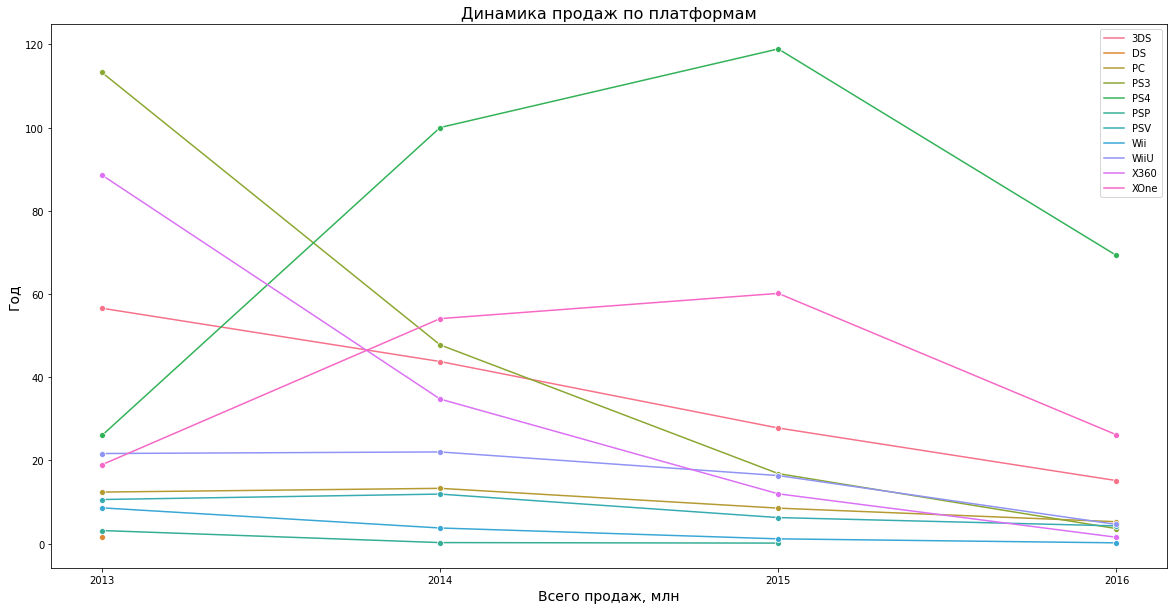

In [26]:
fig, ax = plt.subplots(figsize =(20,10))
ax = sns.lineplot(data=df_actual_1, y='total_sales', x='year_of_release', hue='platform', marker='o')
ax.legend (loc='upper right')
ax.set_title('Динамика продаж по платформам', fontsize = 16)
ax.set_xlabel ('Всего продаж, млн', fontsize = 14)
plt.xticks(np.arange(2013, 2017, 1))
ax.set_ylabel ('Год', fontsize = 14);

<b>Вывод: </b> Как видно из графика наиболее прибыльными платформами являюся `PS4`, `Xbox 360`, `Nintendo DS`. Стоит отметить, что в 2016 наблюдается сильный спад, возможно данные за неполный год. При планировании на 2017 год стоит обратить внимание на вышеописанные платформы, а также `PC`, `Wii` - как самые стабильные продажи и на `Xbox one`, `PS Vita` - как на достаточно молодые и перспективные платформы.

<u><b> Распределение продаж по платформам

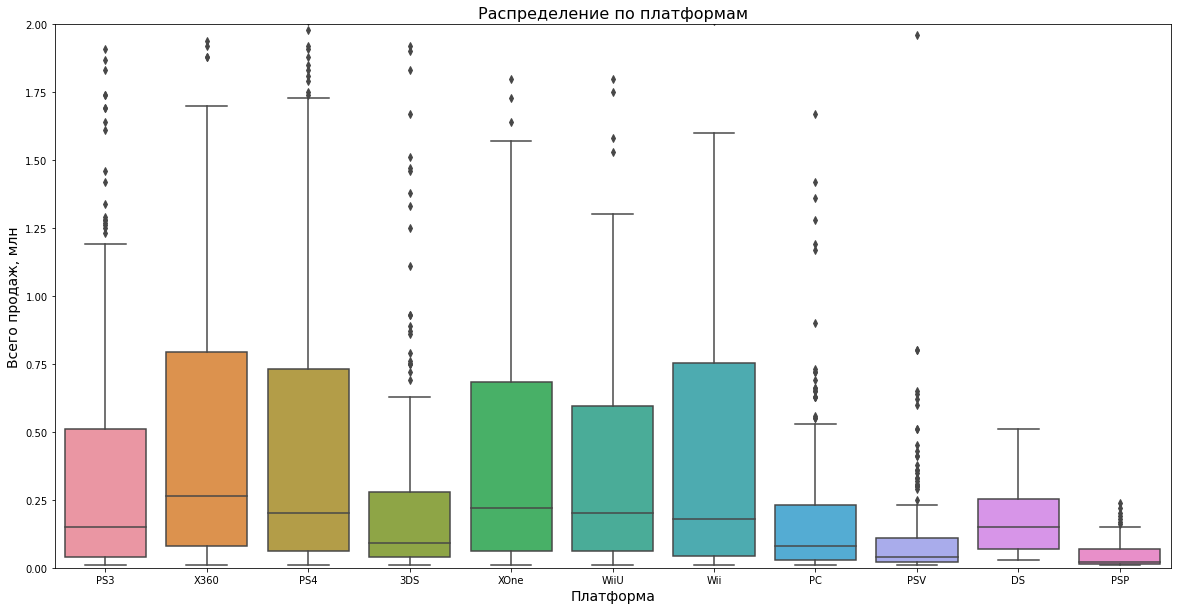

In [27]:
#построение диаграммы размаха
fig, ax = plt.subplots(figsize =(20,10))
sns.boxplot(x = 'platform', y = 'total_sales', data = df_actual)
plt.ylim(0, 2)
plt.title('Распределение по платформам', fontsize = 16)
plt.ylabel('Всего продаж, млн', fontsize = 14)
plt.xlabel('Платформа', fontsize = 14);

<b>Вывод: </b> Как видно из построенной диаграммы размаха медиана у `PS4`, `PS3` и `Wii` меньше, чем у `Xbox 360` и `Xbox one`. В целом у всех вышеописанных платформ хорошее медианное значение, перекос идет в положительную сторону. Правда `PS3` видется все-таки уже менее интересным.

<u><b> Анализ влияния оценки критиков и пользователей

Рассмотрим влияние оценок критиокв и пользователей на продажи игр на примере  PS4

In [28]:
#выберем данные по PS4
PS4_info = df_actual.query('platform == "PS4"')

#отфильтруем маркеры, которые ранее были отмечены как "-1"
PS4_info = PS4_info.query('critic_score != -1 & user_score != -1')

              critic_score  total_sales
critic_score      1.000000     0.550628
total_sales       0.550628     1.000000


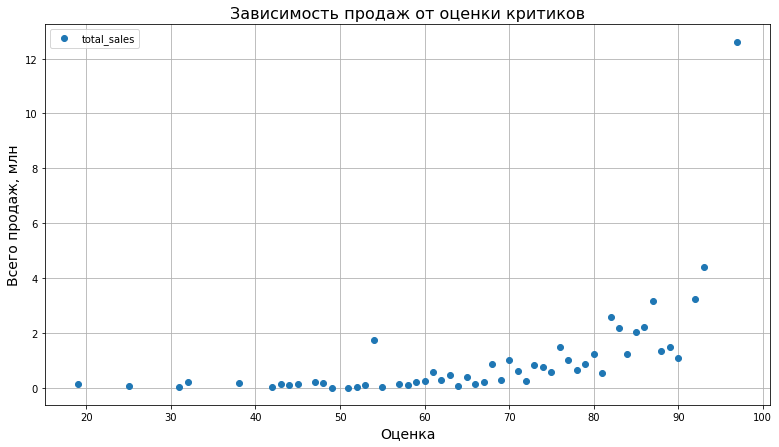

In [29]:
#построим диаграмму рассеивания для анализа влияния оценки критиков
PS4_info.pivot_table(index='critic_score', values='total_sales').plot(grid=True, style='o', figsize=(13, 7))
plt.title('Зависимость продаж от оценки критиков', fontsize = 16)
plt.xlabel('Оценка', fontsize = 14)
plt.ylabel('Всего продаж, млн', fontsize = 14);
print(PS4_info.pivot_table(index='critic_score', values=['total_sales']).reset_index().corr())

<b>Вывод: </b> Из диаграммы рассеивания и расчета корреляции видно что общие продажи на `PS4` и оценка критиков имеют заметную корреляцию (0,55). Особенно это заметно при хороших оценках - как правило в таких случаях продаж больше. 

             user_score  total_sales
user_score     1.000000     0.162508
total_sales    0.162508     1.000000


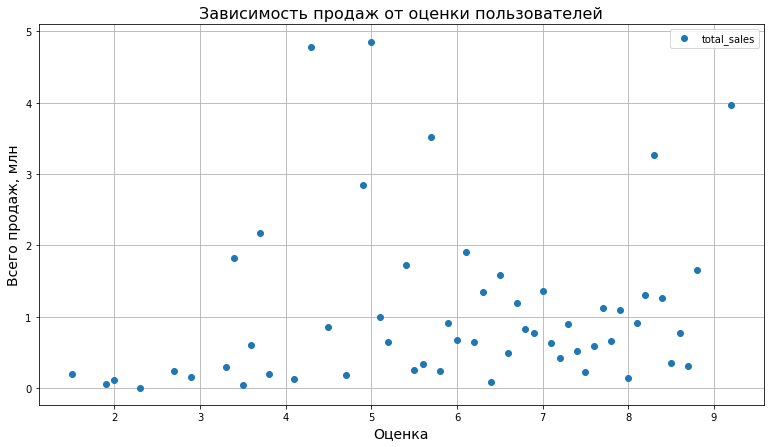

In [30]:
#построим диаграмму рассеивания для анализа влияния оценки пользователей
PS4_info.pivot_table(index='user_score', values='total_sales').plot(grid=True, style='o', figsize=(13, 7))
plt.title('Зависимость продаж от оценки пользователей', fontsize = 16)
plt.xlabel('Оценка', fontsize = 14)
plt.ylabel('Всего продаж, млн', fontsize = 14);
print(PS4_info.pivot_table(index='user_score', values=['total_sales']).reset_index().corr())

<b>Вывод: </b> Из диаграммы рассеивания и расчета корреляции видно что общие продажи на `PS4` и оценка пользователей имеют слабую корреляцию (0,16). Оценки пользователей никак не влияют на продажи.

In [31]:
#отфильтруем маркеры, которые ранее были отмечены как "-1" для всех платформа

all_info = df_actual.query('critic_score != -1 & user_score != -1')

              critic_score  total_sales
critic_score       1.00000      0.44744
total_sales        0.44744      1.00000


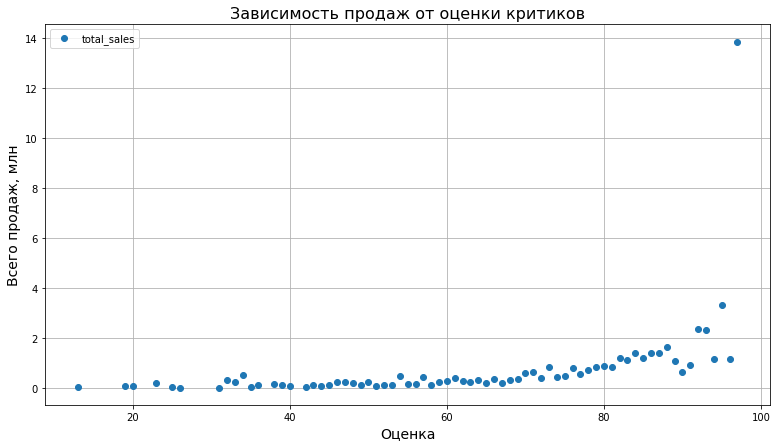

In [32]:
#построим диаграмму рассеивания для анализа влияния оценки критиков
all_info.pivot_table(index='critic_score', values='total_sales').plot(grid=True, style='o', figsize=(13, 7))
plt.title('Зависимость продаж от оценки критиков', fontsize = 16)
plt.xlabel('Оценка', fontsize = 14)
plt.ylabel('Всего продаж, млн', fontsize = 14);
print(all_info.pivot_table(index='critic_score', values=['total_sales']).reset_index().corr())

<b>Вывод: </b> Из диаграммы рассеивания и расчета корреляции видно что общие продажи на всех платформах и оценка критиков имеют умеренную  корреляцию (0,45), что ниже, чем у `PS4`.

             user_score  total_sales
user_score     1.000000     0.107175
total_sales    0.107175     1.000000


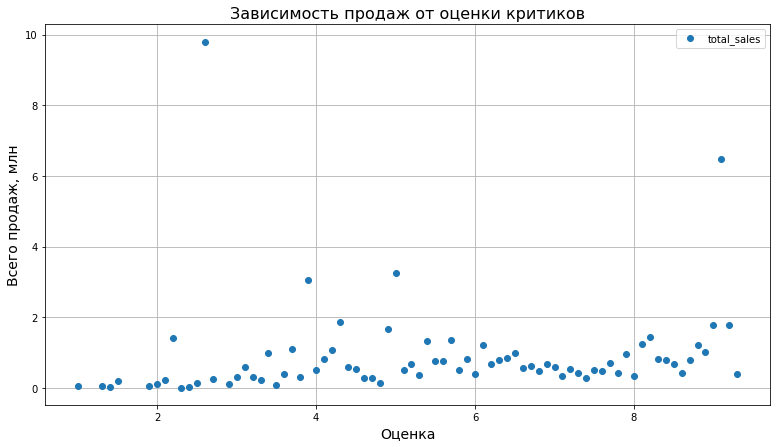

In [33]:
#построим диаграмму рассеивания для анализа влияния оценки критиков
all_info.pivot_table(index='user_score', values='total_sales').plot(grid=True, style='o', figsize=(13, 7))
plt.title('Зависимость продаж от оценки критиков', fontsize = 16)
plt.xlabel('Оценка', fontsize = 14)
plt.ylabel('Всего продаж, млн', fontsize = 14);
print(all_info.pivot_table(index='user_score', values=['total_sales']).reset_index().corr())

<b>Вывод: </b> Из диаграммы рассеивания и расчета корреляции видно что общие продажи на всех платформах и оценка пользователей имеют слабую  корреляцию (0,11), что сравнимо с `PS4`.

<u><b> Распределение игр по жанрам

In [34]:
genre_info = df_actual.pivot_table(index='genre', values='total_sales', aggfunc=['median', 'sum', 'count'])
genre_info.columns = genre_info.columns.droplevel(1)
genre_info = genre_info.sort_values(by='median', ascending = False)
genre_info

,median,sum,count
genre,,,
Shooter,0.450,232.98,187
Sports,0.240,150.65,214
Platform,0.225,42.63,74
Role-Playing,0.125,145.89,292
Fighting,0.125,35.31,80
Racing,0.120,39.89,85
Action,0.110,321.87,766
Simulation,0.100,21.76,62
Misc,0.100,62.82,155


<b>Вывод: </b> Стоит отметить, что не всегда больший выбор игр дает стабильный доход. Так наиболее стабильный доход показывают игры с жанром `Shooter`, хотя раазнообразие и сумма продаж у них далеко не на первом месте. И наоборот `Adventure` имеет огромный выбор, но при этом маленькое медианное значение и маленькая сумма продаж. Можно выделить жанр `Action` с самой большой суммой продаж, но данный результат достигается имеено огромным количеством игр (таких игр 766, что почти в 2,5 раза больше от второго места), хотя медианное значение у данного жанра среднее. 

### 4. Портрет пользователя каждого региона

<u><b> Европа

<u><i> Распределение по платформам

In [35]:
eu_platf = df_actual.loc[(df_actual['eu_sales'] != 0)]

eu_platf = eu_platf.pivot_table(index='platform', values='eu_sales',aggfunc='count').reset_index()
eu_platf = eu_platf.sort_values(by='eu_sales', ascending = False).head()
eu_platf.style.background_gradient('coolwarm')

,platform,eu_sales
4,PS4,290
10,XOne,218
3,PS3,212
2,PC,187
9,X360,169


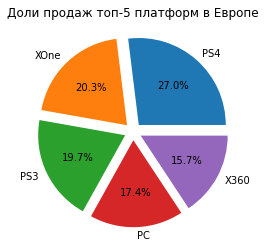

In [36]:
fig, axs = plt.subplots()
axs.set_title('Доли продаж топ-5 платформ в Европе')
axs.pie(eu_platf.eu_sales, 
              labels=eu_platf['platform'], 
              autopct='%1.1f%%', 
              explode=(0.1, 0.1, 0.1, 0.1, 0.1));

<u><i> Распределение по жанрам

In [37]:
eu_platf = df_actual.loc[(df_actual['eu_sales'] != 0)]

eu_platf = eu_platf.pivot_table(index='genre', values='eu_sales',aggfunc='count').reset_index()
eu_platf = eu_platf.sort_values(by='eu_sales', ascending = False).head()
eu_platf.style.background_gradient('coolwarm')

,genre,eu_sales
0,Action,494
8,Shooter,171
10,Sports,169
7,Role-Playing,155
3,Misc,80


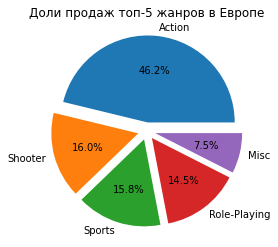

In [38]:
fig, axs = plt.subplots()
axs.set_title('Доли продаж топ-5 жанров в Европе')
axs.pie(eu_platf.eu_sales, 
              labels=eu_platf['genre'], 
              autopct='%1.1f%%', 
              explode=(0.1, 0.1, 0.1, 0.1, 0.1));

<u><i> Распределение по рейтингу ESRB

In [39]:
eu_platf = df_actual.loc[(df_actual['eu_sales'] != 0)]

eu_platf = eu_platf.pivot_table(index='rating', values='eu_sales',aggfunc='count').reset_index()
eu_platf = eu_platf.sort_values(by='eu_sales', ascending = False).head()
eu_platf.style.background_gradient('coolwarm')

,rating,eu_sales
2,M,337
3,RP,336
0,E,265
4,T,253
1,E10+,231


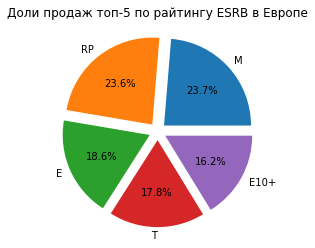

In [40]:
fig, axs = plt.subplots()
axs.set_title('Доли продаж топ-5 по райтингу ESRB в Европе')
axs.pie(eu_platf.eu_sales, 
              labels=eu_platf['rating'], 
              autopct='%1.1f%%', 
              explode=(0.1, 0.1, 0.1, 0.1, 0.1));

<b>Вывод: </b> в Европе нет ярко выраженного лидера среди платформ. С небольшим отрывом идет `PS4` (27%), на втором месте - `Xbox one` (20,3%), далее немного отстает `PS3` (19,7%). А вот по жанрам с большим отрывом идет `Action` (46,2%). На втором-четвертом местах стоят `Shooter`, `Sports` и `Role-Playing` с долями 16%, 15,8% и 14,5% соответственно. По рейтингу на двух первых местах стоят `RP` (23,6%) и `M` (23,7%).

<u><b> Северная Америка

<u><i> Распределение по платформам

In [41]:
na_platf = df_actual.loc[(df_actual['na_sales'] != 0)]

na_platf = na_platf.pivot_table(index='platform', values='na_sales',aggfunc='count').reset_index()
na_platf = na_platf.sort_values(by='na_sales', ascending = False).head()
na_platf.style.background_gradient('coolwarm')

,platform,na_sales
4,PS4,294
9,XOne,227
3,PS3,211
8,X360,170
0,3DS,119


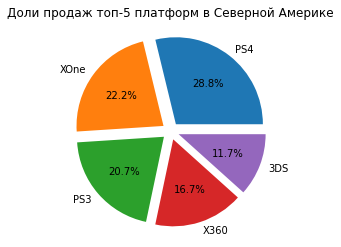

In [42]:
fig, axs = plt.subplots()
axs.set_title('Доли продаж топ-5 платформ в Северной Америке')
axs.pie(na_platf.na_sales, 
              labels=na_platf['platform'], 
              autopct='%1.1f%%', 
              explode=(0.1, 0.1, 0.1, 0.1, 0.1));

<u><i> Распределение по жанрам

In [43]:
na_platf = df_actual.loc[(df_actual['na_sales'] != 0)]

na_platf = na_platf.pivot_table(index='genre', values='na_sales',aggfunc='count').reset_index()
na_platf = na_platf.sort_values(by='na_sales', ascending = False).head()
na_platf.style.background_gradient('coolwarm')

,genre,na_sales
0,Action,442
8,Shooter,171
7,Role-Playing,158
10,Sports,143
3,Misc,84


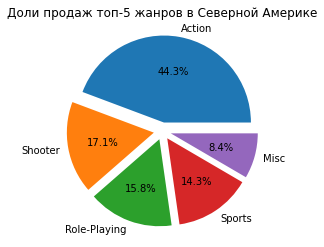

In [44]:
fig, axs = plt.subplots()
axs.set_title('Доли продаж топ-5 жанров в Северной Америке')
axs.pie(na_platf.na_sales, 
              labels=na_platf['genre'], 
              autopct='%1.1f%%', 
              explode=(0.1, 0.1, 0.1, 0.1, 0.1));

<u><i> Распределение по рейтингу ESRB

In [45]:
na_platf = df_actual.loc[(df_actual['na_sales'] != 0)]

na_platf = na_platf.pivot_table(index='rating', values='na_sales',aggfunc='count').reset_index()
na_platf = na_platf.sort_values(by='na_sales', ascending = False).head()
na_platf.style.background_gradient('coolwarm')

,rating,na_sales
2,M,334
3,RP,298
4,T,240
1,E10+,220
0,E,217


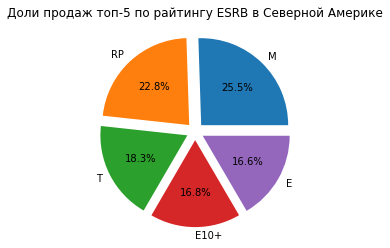

In [46]:
fig, axs = plt.subplots()
axs.set_title('Доли продаж топ-5 по райтингу ESRB в Северной Америке')
axs.pie(na_platf.na_sales, 
              labels=na_platf['rating'], 
              autopct='%1.1f%%', 
              explode=(0.1, 0.1, 0.1, 0.1, 0.1));

<b>Вывод: </b> в Северной Америке распределение по  платформам еще более плотное. `PS4` вновь лидер с долей 28,8%, на втором месте - `Xbox one` (22,2%), далее `PS3` (20,7%). По жанрам с большим отрывом также идет `Action` (44,3%). На втором-четвертом местах стоят `Shooter`, `Role-Playing` и `Sports` с долями 17,1%, 15,8% и 14,3% соответственно. По рейтингу на двух первых местах также стоят `RP` (22,8%) и `M` (25,5%).

<u><b> Япония

<u><i> Распределение по платформам

In [47]:
jp_platf = df_actual.loc[(df_actual['jp_sales'] != 0)]

jp_platf = jp_platf.pivot_table(index='platform', values='jp_sales',aggfunc='count').reset_index()
jp_platf = jp_platf.sort_values(by='jp_sales', ascending = False).head()
jp_platf.style.background_gradient('coolwarm')

,platform,jp_sales
4,PSV,316
1,PS3,236
0,3DS,235
2,PS4,223
3,PSP,66


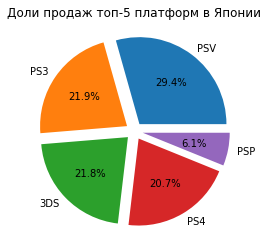

In [48]:
fig, axs = plt.subplots()
axs.set_title('Доли продаж топ-5 платформ в Японии')
axs.pie(jp_platf.jp_sales, 
              labels=jp_platf['platform'], 
              autopct='%1.1f%%', 
              explode=(0.1, 0.1, 0.1, 0.1, 0.1));

<u><i> Распределение по жанрам

In [49]:
jp_platf = df_actual.loc[(df_actual['jp_sales'] != 0)]

jp_platf = jp_platf.pivot_table(index='genre', values='jp_sales',aggfunc='count').reset_index()
jp_platf = jp_platf.sort_values(by='jp_sales', ascending = False).head()
jp_platf.style.background_gradient('coolwarm')

,genre,jp_sales
0,Action,400
7,Role-Playing,236
1,Adventure,165
3,Misc,90
8,Shooter,69


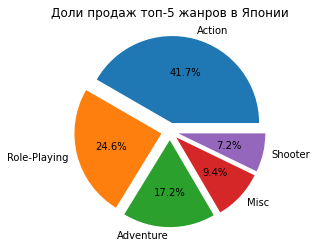

In [50]:
fig, axs = plt.subplots()
axs.set_title('Доли продаж топ-5 жанров в Японии')
axs.pie(jp_platf.jp_sales, 
              labels=jp_platf['genre'], 
              autopct='%1.1f%%', 
              explode=(0.1, 0.1, 0.1, 0.1, 0.1));

<u><i> Распределение по рейтингу ESRB

In [51]:
jp_platf = df_actual.loc[(df_actual['jp_sales'] != 0)]

jp_platf = jp_platf.pivot_table(index='rating', values='jp_sales',aggfunc='count').reset_index()
jp_platf = jp_platf.sort_values(by='jp_sales', ascending = False).head()
jp_platf.style.background_gradient('coolwarm')

,rating,jp_sales
3,RP,712
4,T,181
2,M,159
0,E,77
1,E10+,58


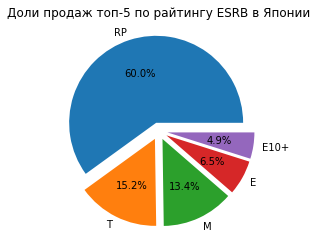

In [52]:
fig, axs = plt.subplots()
axs.set_title('Доли продаж топ-5 по райтингу ESRB в Японии')
axs.pie(jp_platf.jp_sales, 
              labels=jp_platf['rating'], 
              autopct='%1.1f%%', 
              explode=(0.1, 0.1, 0.1, 0.1, 0.1));

<b>Вывод: </b> в Японии распределение по  платформам совсем другое. В лидерах `PSV` (29,4%), далее `PS3` (21,9%), на третьем месте - `3DS` (21,8%), и только потом `PS4` с долей 20,7%. По жанрам все также на первом месте `Action` (41,7%). На втором-третьем местах стоят `Role-Playing`, `Adventure` с долями 14,6% и 17,2% соответственно. По рейтингу большую часть составляет `RP` (60%).

<b>Вывод по 4 пункту: </b> в Европе и Севернеой Америке популярность платформ приблизительно одинакова: на первом месте `PS4`, на втором - `Xbox one`, на третьем - `PS3`. А вот в Японии большей популярностью пользуются портативные платформы: об этом говорит и первое место `PSV` и присутствие `PSP` в рейтинге. Интересен факт отсутствия какой-либо платформы от `Xbox`. В части жанров во всех сегментах на первом месте с большим отрывом идет `Action`. В Европе и Северной Америке распределение также похоже, вопрос только в местах: в Европе `Sports` на третьем месте, `Role-Playing` на четвертом, а в Семерной Америке наоборот. В Японии `Shooter` и `Sports` не пользуются особой популярностью. По распределению рейтинга на первом месте стоит `RP`, возможно из-за особого интереса пользователей к новуму продукту.

### 5. Проверка гипотез

<b><u>Гипотеза № 1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

In [53]:
df_actual = df_actual.query('user_score != -1')

# отбор PC платформ
pc_rating = df_actual.loc[df_actual['platform'] == 'PC']['user_score']

# отбор Xbox one платформ
Xbox_one_rating = df_actual.loc[df_actual['platform'] == 'XOne']['user_score']

In [54]:
# проверка дисперсий
print('Дисперсия платформы PC равна', np.var(pc_rating).round(2))
print('Дисперсия платформы Xbox one равна', np.var(Xbox_one_rating).round(2))

Дисперсия платформы PC равна 3.02
Дисперсия платформы Xbox one равна 1.9


Проверим две генеральные совакупности, для этого применим метод scipy.stats.ttest_ind. Так как, массивы данных достаточно расношерстные и их дисперсии не равны, зададим паметру equal_var значение False.

За нулевую гипотезу $H_{0}$ примем вариант, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
За альтернативную гипотезу$H_{1}$ примем противоположный вариант, что средние пользовательские рейтинги платформ Xbox One и PC разные.

Уровень статистической значимость зададим раным 0.05.

In [55]:
alpha = .05

results = st.ttest_ind(pc_rating, Xbox_one_rating, equal_var=False)

print('p-значение:', results.pvalue.round(3))

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.148
Не получилось отвергнуть нулевую гипотезу


Значение p-value показывает: вероятность случайно получить такое или большее различие равна почти 15%. Это достаточно большая вероятность, чтобы делать вывод о значимом различии между платформами. Таким образом гипотеза $H_{0}$ о том, что средние пользовательские рейтинги платформ `Xbox One` и `PC` одинаковые подтвердилась, что достаточно логично, так как игры на платформах одинаковы.

<b><u>Гипотеза № 2. Средние пользовательские рейтинги жанров Action и Sports разные.

In [56]:
# отбор PC платформ
action_rating = df_actual.loc[df_actual['genre'] == 'Action']['user_score']

# отбор Xbox one платформ
sports_rating = df_actual.loc[df_actual['genre'] == 'Sports']['user_score']

In [57]:
# проверка дисперсий
print('Дисперсия платформы PC равна', np.var(action_rating).round(2))
print('Дисперсия платформы Xbox one равна', np.var(sports_rating).round(2))

Дисперсия платформы PC равна 1.76
Дисперсия платформы Xbox one равна 3.16


Для проверки двух генеральных совакупностей также применим метод scipy.stats.ttest_ind. Массивы данных также достаточно разные и их дисперсии не равны, зададим паметру equal_var также значение False.

За нулевую гипотезу $H_{0}$ примем вариант, что средние пользовательские рейтинги жанров Action и Sports одинаковые.
За альтернативную гипотезу$H_{1}$ примем противоположный вариант, что средние пользовательские рейтинги жанров Action и Sports разные.

Уровень статистической значимость зададим раным 0.05.

In [58]:
alpha = .05

results = st.ttest_ind(action_rating, sports_rating, equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.4460039700704315e-20
Отвергаем нулевую гипотезу


Значение p-value показывает, что вероятность случайно получить такое или большее различие равна почти 0. Такие результаты позволяют нам сделать вывод, что гипотиза $H_{1}$ о том, что средние пользовательские рейтинги жанров `Action` и `Sports` разные подтвердилась.

<b>Вывод: </b> При формировании основных гипотиз за основу были взяты предположения что пользовательские рейтинг как платформ, так и рейтингов равны. За альтернативные гипотизы принимались противоположные значения. При проверке гипотиз можно отметить, что обе гипотизы подтвердились (что средние пользовательские рейтинги жанров `Action` и `Sports` разные и, что средние пользовательские рейтинги платформ `Xbox One` и `PC` одинаковые). Однако стоит отметить, что в первом случае оснавная гипотиза применялась, как альтернативная, а во втором уже наоборт.

### 6. Общий вывод

<div style="text-align: justify ">
<b><i>1) В части предобработки данных</i></b><br><br>
Датафрейм состоит из 16 715 строк. При анализе массива данных было обнаружено большое количество пропущенных значений. Пропуски по столбцам с наименование, жанром и годома выпуска были удалены, так как в общей массей их было достаточно мало (менее 2%). Пропуски по  столбцам с оценками критиков ипользователей обусловлены фактическим отсутствием оценок, что в свою очередь подтерждает значение "tbd" («To Be Determined»). Пропуски в рейтинге были заменены на категорию <b>RP</b> - «Рейтинг ожидается». Был добавлен столбец с числом продаж по всем регионам. При анализе данных каких-либо дубликатов выявлено не было. В ходе анализа была обнаружена одна аномалия в первом году выпуска игры на Nintendo DS был 1985, хотя приставка была выпущена в только в 2004.

<b><i>2) В части исследовательсокго анализа данных</i></b><br><br>
- рост по созданию игр наблюдается с 1994 года, но игр создавалось еще крайне мало (менее 200 в год). Большой скачок уже наблюдается в 2002 году (более 800 игр в год). Пик приходится на 2008, 2009 года, в эти года производилось более 1400 игр в год. Затем наблюдается снижение;
- средний срок "жизни" платформы составляет 6-8 лет с пиком популярности на 3-6 года. Сильный рост популярности замечается уже со второго года, возможно это связано с доступностью игровых приставок;
-  наиболее прибыльными платформами являюся `PS4`, `Xbox 360`, `Nintendo DS`. Стоит отметить, что в 2016 наблюдается сильный спад, возможно данные за неполный год. При планировании на 2017 год стоит обратить внимание на вышеописанные платформы, а также `PC`, `Wii` - как самые стабильные продажи и на `Xbox one`, `PS Vita` - как на достаточно молодые и перспективные платформы;
- наиболее стабильный доход показывают игры с жанром `Shooter`, хотя раазнообразие и сумма продаж не на первом месте. Можно выделить жанр `Action` с самой большой суммой продаж, но данный результат достигается имеено огромным количеством игр, хотя медианное значение у данного жанра среднее;
- было определено, что взаимосвязь между продажами и оценками пользователей достаточно слаба, почти стремится к нулю. Между продажами и оценкеами критиков наблюдается заметная корреляция;
- наиболее популярными и прибыльными являются жанры `Action` (количество продаж более 300 млн копий, и почти 800 разновидностей). Стоит отметить, что разнообразие игр по внутри жанра не всегда приводит к лучшим продажам;

<b><i>3) В части анализ пользователя для каждого региона</i></b><br><br>
В Европе и Севернеой Америке популярность платформ приблизительно одинакова: на первом месте `PS4`, на втором - `Xbox one`, на третьем - `PS3`. В Японии большей популярностью пользуются портативные платформы: об этом говорит и первое место `PSV` и присутствие `PSP` в рейтинге. Интересен факт отсутствия какой-либо платформы от `Xbox` в Японии. В части жанров во всех сегментах на первом месте с большим отрывом идет `Action`. В Европе и Северной Америке распределение также похоже, вопрос только в местах: в Европе `Sports` на третьем месте, `Role-Playing` на четвертом, а в Семерной Америке наоборот. В Японии `Shooter` и `Sports` не пользуются особой популярностью. По распределению рейтинга на первом месте стоит `RP`, возможно из-за особого интереса пользователей к новуму продукту.

<b><i>4) В части проверки гипотиз</i></b><br><br>
В ходе проведения анализа гипотезы о том, что средние пользовательские рейтинги платформ `Xbox One` и `PC` одинаковые и, что средние пользовательские рейтинги жанров `Action` и `Sports` разные подтвердились.
</div>